In [ ]:
# Creo il network per verificare quali sono le review con grado più alto

In [ ]:
import pandas as pd
import networkx as nx

In [ ]:
nodes = pd.read_csv('nodes_FINAL_with_topic.csv')
edges = pd.read_csv('edges_FINAL_with_topic.csv')
edges

,Source,Target,Relation
0,TOPIC0,8807900521RW2358,YT
1,TOPIC0,8807900521RW2365,YT
2,TOPIC0,8807900521RW2367,YT
3,TOPIC0,8807900521RW2368,YT
4,TOPIC0,8807900521RW2369,YT
...,...,...,...
25087,8806253662RW1728,8806253662RW1728UF1,YZ
25088,8806253662RW1729,8806253662RW1729UF0,YZ
25089,8806253662RW1733,8806253662RW1733UF0,YZ
25090,8806253662RW1733,8806253662RW1733UF1,YZ


In [ ]:
G = nx.MultiGraph()
for idx, node in nodes.iterrows():
  G.add_node(node[0], type=node[1])

for idx, edge in edges.iterrows():
  G.add_edge(edge[0], edge[1], type=edge[2])

<ipython-input-4-d0173c9423bd>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  G.add_node(node[0], type=node[1])
<ipython-input-4-d0173c9423bd>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  G.add_edge(edge[0], edge[1], type=edge[2])


In [ ]:
# Devo ordinare i nodu Y per legami con nodi Z
node_type = 'Y'

# Filter nodes by type
nodes_of_type = [node for node, attrs in G.nodes(data=True) if attrs.get('type') == node_type]
print("Numero di nodi di tipo Y: " + str(len(nodes_of_type)))

print(type(nodes_of_type))
for y_node in nodes_of_type:
  filtered_edges = [d for u, v, d in G.edges('nodoY', data=True) if d.get('type') == 'YZ']
  count_yz = len(filtered_edges)


Numero di nodi di tipo Y: 3748
<class 'list'>


In [ ]:
final_dataset = pd.read_json('product_reviews_comments_topic_emozscores_FINAL.jsonl', lines=True)

In [ ]:
final_dataset

,index,book_code,title_review,description_review,useful_description,useful_num,idx_2,topic_num,topic_description,EMO_ZSCORES,MEANINGFUL_EMOTIONS,TOKEN_LEN,COMPLEX_EMOTIONS,NODE_INDEX
0,0,B0CLML6FM8,Utile e ben fatto,E' uno dei resoconti piu' ordinati che abbia m...,9 persone l'hanno trovato utile,9,1,4,Giudizio morale e memoria,"{'anger': -0.818343699890104, 'trust': 1.99654...","[trust_above, surprise_above]",129,[curiosity],B0CLML6FM8RW0
1,1,B0CLML6FM8,attuale,Bel libro attuale e snocciola le problematiche...,Una persona l'ha trovato utile,1,2,5,Conflitto Israelo-Palestinese,"{'anger': -0.775421929962508, 'trust': 1.02689...",[],46,[],B0CLML6FM8RW1
2,2,B0CLML6FM8,israele e palestinesi,"interessante ma troppo denso di informazioni ,...",None,0,3,4,Giudizio morale e memoria,"{'anger': 0, 'trust': 0, 'surprise': 0, 'disgu...",[],11,[],B0CLML6FM8RW2
3,3,B0CLML6FM8,Molto articolato,Il Giornalista indipendente per antonomasia è ...,6 persone l'hanno trovato utile,6,4,3,Vannacci,"{'anger': 0.195412787498412, 'trust': 0.306916...",[],106,[],B0CLML6FM8RW3
4,4,B0CLML6FM8,Buono per una visione a volo d'uccello,Fornisce una ossatura cronologica degli eventi...,Una persona l'ha trovato utile,1,5,4,Giudizio morale e memoria,"{'anger': 0, 'trust': 0, 'surprise': 0, 'disgu...",[anticipation_above],34,[],B0CLML6FM8RW4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,3743,8807036525,Leggetelo.,"Parte bene da subito, questo bellissimo raccon...",Una persona l'ha trovato utile,1,3744,1,Esperienza di lettura,"{'anger': -1.324697860891705, 'trust': 3.10860...","[trust_above, surprise_above, anticipation_above]",70,"[hope, curiosity, confusion]",8807036525RW3743
3744,3744,8807036525,Ni,"Carino, ma nulla di eccezionale.",None,0,3745,1,Esperienza di lettura,"{'anger': 0, 'trust': 0, 'surprise': 0, 'disgu...",[joy_above],6,[],8807036525RW3744
3745,3745,8807036525,Un'occasione mancata,"Troppo sbrigativo, tutto troppo rapido. Si sen...",2 persone l'hanno trovato utile,2,3746,5,Conflitto Israelo-Palestinese,"{'anger': -1.270183118739682, 'trust': 1.04351...",[],102,[],8807036525RW3745
3746,3746,8807036525,Fantastico romanzo d'esordio!,"Già nel 1993, quando cominciò a farsi notare a...",Una persona l'ha trovato utile,1,3747,9,Storia e memoria del fascismo in Italia,"{'anger': -2.473580548122012, 'trust': 1.91482...","[anger_under, joy_above, fear_under, anticipat...",774,[optimism],8807036525RW3746


In [ ]:
# dataset ordinato per numero di interazione sulla review
final_dataset_sorted_by_usefulnum = final_dataset.sort_values(by='useful_num', ascending=False)

In [ ]:
final_dataset_sorted_by_usefulnum[['book_code', 'useful_num', 'topic_num', 'topic_description', 'MEANINGFUL_EMOTIONS', 'COMPLEX_EMOTIONS', 'TOKEN_LEN', 'NODE_INDEX']][:36]

,book_code,useful_num,topic_num,topic_description,MEANINGFUL_EMOTIONS,COMPLEX_EMOTIONS,TOKEN_LEN,NODE_INDEX
144,B0CF4BJN3D,824,3,Vannacci,"[anger_under, trust_above, fear_under]",[],786,B0CF4BJN3DRW144
142,B0CF4BJN3D,593,4,Giudizio morale e memoria,"[trust_above, disgust_under, anticipation_above]",[hope],673,B0CF4BJN3DRW142
1052,B0CF4BJN3D,461,0,Società e identità,[anticipation_above],[],136,B0CF4BJN3DRW1052
972,B0CF4BJN3D,417,9,Storia e memoria del fascismo in Italia,"[trust_above, disgust_under]",[],1052,B0CF4BJN3DRW972
163,B0CF4BJN3D,413,3,Vannacci,"[fear_under, anticipation_above]",[],746,B0CF4BJN3DRW163
3113,B0CF4BJN3D,318,0,Società e identità,[disgust_under],[],417,B0CF4BJN3DRW3113
2272,B0CF4BJN3D,242,5,Conflitto Israelo-Palestinese,[trust_above],[],1366,B0CF4BJN3DRW2272
1042,B0CF4BJN3D,229,3,Vannacci,[trust_above],[],131,B0CF4BJN3DRW1042
1017,B0CF4BJN3D,222,0,Società e identità,[],[],131,B0CF4BJN3DRW1017
149,B0CF4BJN3D,220,3,Vannacci,[trust_above],[],860,B0CF4BJN3DRW149


In [ ]:
# Qual'è la media generale di lunghezza dele review?
print(f"useful_num - Mean {final_dataset_sorted_by_usefulnum['useful_num'].mean() } ")
print(f"useful_num - SUm  {final_dataset_sorted_by_usefulnum['useful_num'].sum()}")
print(f"useful_num - Deviazione standard  {final_dataset_sorted_by_usefulnum['useful_num'].std()}")

num_zero = (final_dataset_sorted_by_usefulnum['useful_num'] == 0).sum()
print(f"Numero di record con useful_num a zero {num_zero}")

print(f"Primo quartile {final_dataset_sorted_by_usefulnum['useful_num'].quantile(0.25)}")
print(f"Secondo quartile {final_dataset_sorted_by_usefulnum['useful_num'].quantile(0.5)}")
print(f"Terzo quartile {final_dataset_sorted_by_usefulnum['useful_num'].quantile(0.75)}")
print(f"90° {final_dataset_sorted_by_usefulnum['useful_num'].quantile(0.90)}")
print(f"95° {final_dataset_sorted_by_usefulnum['useful_num'].quantile(0.95)}")
print(f"99° {final_dataset_sorted_by_usefulnum['useful_num'].quantile(0.99)}")

num_100 = (final_dataset_sorted_by_usefulnum['useful_num'] > 100).sum()
print(f"Numero di record con useful_num superiore a 100 {num_100}")



useful_num - Mean 4.6947705442902885 
useful_num - SUm  17596
useful_num - Deviazione standard  25.949453121298774
Numero di record con useful_num a zero 1930
Primo quartile 0.0
Secondo quartile 0.0
Terzo quartile 2.0
90° 8.0
95° 16.0
99° 83.17999999999847
Numero di record con useful_num superiore a 100 33


In [ ]:
# Qual'è la media generale di lunghezza dele review?
print(f"useful_num - Mean {final_dataset_sorted_by_usefulnum['TOKEN_LEN'].mean() } ")
print(f"useful_num - SUm  {final_dataset_sorted_by_usefulnum['TOKEN_LEN'].sum()}")
print(f"useful_num - Deviazione standard  {final_dataset_sorted_by_usefulnum['TOKEN_LEN'].std()}")

num_zero = (final_dataset_sorted_by_usefulnum['TOKEN_LEN'] == 0).sum()
print(f"Numero di record con TOKEN_LEN a zero {num_zero}")

print(f"Primo quartile {final_dataset_sorted_by_usefulnum['TOKEN_LEN'].quantile(0.25)}")
print(f"Secondo quartile {final_dataset_sorted_by_usefulnum['TOKEN_LEN'].quantile(0.5)}")
print(f"Terzo quartile {final_dataset_sorted_by_usefulnum['TOKEN_LEN'].quantile(0.75)}")
print(f"90° {final_dataset_sorted_by_usefulnum['TOKEN_LEN'].quantile(0.90)}")
print(f"95° {final_dataset_sorted_by_usefulnum['TOKEN_LEN'].quantile(0.95)}")
print(f"99° {final_dataset_sorted_by_usefulnum['TOKEN_LEN'].quantile(0.99)}")

num_100 = (final_dataset_sorted_by_usefulnum['TOKEN_LEN'] > 102).sum()
print(f"Numero di record con useful_num superiore a 100 {num_100}")
# TODO -> POTREBBE ESSERE INTERESSANTE VERIFICARE A QUALI LIBRI APPARTENGONO LE REVIEW CHE HANNO TOKEN LEN MAGGIORE DI 102, CHE RISPECCHIA IL 90° PERCENTILE

df_tokenlen_90_percentile = final_dataset_sorted_by_usefulnum[final_dataset_sorted_by_usefulnum['TOKEN_LEN'] >= final_dataset_sorted_by_usefulnum['TOKEN_LEN'].quantile(0.90)]

useful_num - Mean 50.53735325506937 
useful_num - SUm  189414
useful_num - Deviazione standard  103.10893414565165
Numero di record con TOKEN_LEN a zero 1
Primo quartile 11.0
Secondo quartile 26.0
Terzo quartile 51.0
90° 102.0
95° 164.0
99° 461.52999999999975
Numero di record con useful_num superiore a 100 372


In [ ]:
book_tokenlen_90_percentile_count = df_tokenlen_90_percentile['book_code'].value_counts()

# Conta le occorrenze di ciascun book_code
df_book_counts = df_tokenlen_90_percentile['book_code'].value_counts().reset_index()
df_book_counts.columns = ['book_code', 'count']

# Calcola la proporzione sul totale del DataFrame principale
df_book_counts['ratio_on_total'] = df_book_counts['count'] / len(df_tokenlen_90_percentile)

# Risultato: un DataFrame con book_code, count e rapporto percentuale
print(df_book_counts)

# IMPORTANT -> PRIMO INSIGHT -> QUASI IL 30% DELLE REVIEW CON TOKEN_LEN MAGGIORE DEL 90 PERCENTILE SONO DI UN SOLO LIBRO, LE ALTRE SONO DISTRIBUITE SU PIÙ DI 30 RECORD
'''
0   B0CF4BJN3D    108        0.282723
1   8807897458     31        0.081152
2   8830104957     21        0.054974
3   8804751169     16        0.041885
4   8893881284     14        0.036649
'''

     book_code  count  ratio_on_total
0   B0CF4BJN3D    108        0.282723
1   8807897458     31        0.081152
2   8830104957     21        0.054974
3   8804751169     16        0.041885
4   8893881284     14        0.036649
5   8858043057     13        0.034031
6   B01N3CYKW1     13        0.034031
7   8893442418     12        0.031414
8   B076H8MFMJ     12        0.031414
9   B0CLML6FM8     11        0.028796
10  8807900521      8        0.020942
11  8896985625      8        0.020942
12  8804665289      7        0.018325
13  B00DJ2KYQQ      6        0.015707
14  885815553X      6        0.015707
15  B0CK1D7NYC      5        0.013089
16  B0CB237DYY      5        0.013089
17  B09MYSV86T      5        0.013089
18  1798606364      5        0.013089
19  B0D5T7WZPK      5        0.013089
20  B0CTS4LK18      4        0.010471
21  B0DPJJVD32      4        0.010471
22  8804776455      4        0.010471
23  8893780712      4        0.010471
24  8807036525      4        0.010471
25  B0DP1JD4

'\n0   B0CF4BJN3D    108        0.282723\n1   8807897458     31        0.081152\n2   8830104957     21        0.054974\n3   8804751169     16        0.041885\n4   8893881284     14        0.036649\n'

In [ ]:
final_dataset_sorted_by_usefulnum[['useful_num', 'TOKEN_LEN']].corr()

,useful_num,TOKEN_LEN
useful_num,1.000000,0.421601
TOKEN_LEN,0.421601,1.000000


In [ ]:
final_dataset_sorted_by_usefulnum[['useful_num', 'TOKEN_LEN']].corr(method='spearman')

,useful_num,TOKEN_LEN
useful_num,1.000000,0.449151
TOKEN_LEN,0.449151,1.000000


<Axes: xlabel='TOKEN_LEN', ylabel='useful_num'>

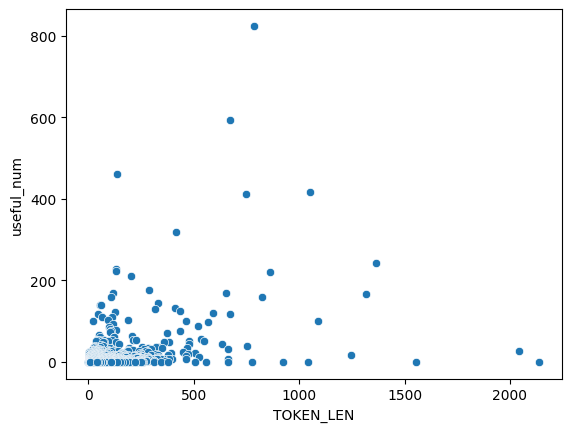

In [ ]:
import seaborn as sns
sns.scatterplot(data=final_dataset_sorted_by_usefulnum, x='TOKEN_LEN', y='useful_num')

In [ ]:
final_dataset_sorted_by_usefulnum[final_dataset_sorted_by_usefulnum['book_code'] == 'B0CF4BJN3D'][['useful_num', 'TOKEN_LEN']].corr()

,useful_num,TOKEN_LEN
useful_num,1.00000,0.58805
TOKEN_LEN,0.58805,1.00000


In [ ]:
# IMPORTANT -> ALTRO INSIGHT, C'È UNA CORRELAZIONE MODERATA IN GENERALE TRA USEFUL_NUM E TOKEN_LEN, MA SELEZIONANDO IL LIBRO DI VANNACCI LA CORRELAZIONE MIGLIORA PARTICOLARMENTE
# E POTREBBE INDICARE CHE EFFETTIVAMENTE POTREBBE ESSERE UN INDICATORE DI POLARIZZAZIONE, ESSENDO CHE ATTIRANO PIÙ INTERAZIONI SOCIALI

In [ ]:
# Ora voglio veriricare la correlazione tra numero di emozioni significative espresse dalle review con useful_num
final_dataset_sorted_by_usefulnum['num_emotions'] = final_dataset_sorted_by_usefulnum['MEANINGFUL_EMOTIONS'].apply(len)


In [ ]:
final_dataset_sorted_by_usefulnum[['useful_num', 'num_emotions']].corr()

,useful_num,num_emotions
useful_num,1.000000,0.017672
num_emotions,0.017672,1.000000


In [ ]:
final_dataset_sorted_by_usefulnum['num_complex_emotions'] = final_dataset_sorted_by_usefulnum['COMPLEX_EMOTIONS'].apply(len)


In [ ]:
final_dataset_sorted_by_usefulnum[['useful_num', 'num_complex_emotions']].corr()

,useful_num,num_complex_emotions
useful_num,1.000000,-0.033066
num_complex_emotions,-0.033066,1.000000


In [ ]:
from scipy.stats import spearmanr

spearmanr(final_dataset_sorted_by_usefulnum['useful_num'], final_dataset_sorted_by_usefulnum['TOKEN_LEN'])
# IMPORTANTE DATO SIGNIFICATIVO

SignificanceResult(statistic=np.float64(0.44915107029970447), pvalue=np.float64(1.5207482880738465e-185))

In [ ]:
final_dataset_sorted_by_usefulnum[final_dataset_sorted_by_usefulnum['topic_num'] == 3]['useful_num']

,useful_num
144,824
163,413
1042,229
149,220
982,211
...,...
1112,0
49,0
1124,0
1122,0


In [ ]:
spearmanr(final_dataset_sorted_by_usefulnum[final_dataset_sorted_by_usefulnum['topic_num'] == 3]['useful_num'], final_dataset_sorted_by_usefulnum[final_dataset_sorted_by_usefulnum['topic_num'] == 3]['num_emotions'])


SignificanceResult(statistic=np.float64(0.0006302859600046225), pvalue=np.float64(0.9896389318716585))

In [ ]:
final_dataset_sorted_by_usefulnum['has_emotion'] = final_dataset_sorted_by_usefulnum['MEANINGFUL_EMOTIONS'].apply(lambda x: 1 if len(x) > 0 else 0)
spearmanr(final_dataset_sorted_by_usefulnum[final_dataset_sorted_by_usefulnum['book_code'] == 'B0CF4BJN3D']['useful_num'], final_dataset_sorted_by_usefulnum[final_dataset_sorted_by_usefulnum['book_code'] == 'B0CF4BJN3D']['num_emotions'])


SignificanceResult(statistic=np.float64(0.09734841696024926), pvalue=np.float64(0.04590918604807658))

In [ ]:
# IMPORTANT -> SEMBREREBBE CHE NON CI SIA ALCUNA RELAZIONE TRA IL NUMERO DI INTERAZIONI E LA PRESENZA O MENO DI EMOZIONI SIGNIFICATIVE

In [ ]:
spearmanr(final_dataset_sorted_by_usefulnum[final_dataset_sorted_by_usefulnum['book_code'] == 'B0CF4BJN3D']['useful_num'], final_dataset_sorted_by_usefulnum[final_dataset_sorted_by_usefulnum['book_code'] == 'B0CF4BJN3D']['num_emotions'])
# IMPORTANT VALORE SIGNIFICATO MA VICINO ALLO ZERO e positivo


SignificanceResult(statistic=np.float64(0.09734841696024926), pvalue=np.float64(0.04590918604807658))

In [ ]:
spearmanr(final_dataset_sorted_by_usefulnum[final_dataset_sorted_by_usefulnum['topic_num'] == 3]['useful_num'], final_dataset_sorted_by_usefulnum[final_dataset_sorted_by_usefulnum['topic_num'] == 3]['num_complex_emotions'])
# IMPORTANT VALORE SIGNIFICATO MA VICINO ALLO ZERO e negativo


SignificanceResult(statistic=np.float64(-0.09841898378470766), pvalue=np.float64(0.04208249103306401))

In [ ]:
spearmanr(final_dataset_sorted_by_usefulnum[final_dataset_sorted_by_usefulnum['topic_num'] == 3]['useful_num'], final_dataset_sorted_by_usefulnum[final_dataset_sorted_by_usefulnum['topic_num'] == 3]['TOKEN_LEN'])
# Significativo molto positivo


SignificanceResult(statistic=np.float64(0.4467009344844289), pvalue=np.float64(2.471484652827419e-22))

In [ ]:
# Esplodi le emozioni in righe separate
df_exploded = final_dataset_sorted_by_usefulnum[['topic_description', 'MEANINGFUL_EMOTIONS']].explode('MEANINGFUL_EMOTIONS')

# Rinomina per comodità
df_exploded = df_exploded.rename(columns={'MEANINGFUL_EMOTIONS': 'emotion'})

# Crea tabella con conteggi: righe = topic, colonne = emozioni
emotion_counts = pd.crosstab(df_exploded['topic_description'], df_exploded['emotion'])

# (Opzionale) Ordina le colonne alfabeticamente o per somma
emotion_counts = emotion_counts.sort_index(axis=1)

In [ ]:
emotion_counts

emotion,anger_above,anger_under,anticipation_above,disgust_above,disgust_under,fear_above,fear_under,joy_above,joy_under,sadness_above,sadness_under,surprise_above,trust_above
topic_description,,,,,,,,,,,,,
Analisi ideologica del fascismo,15,3,93,9,9,28,8,74,0,36,2,33,137
Conflitto Israelo-Palestinese,11,3,57,11,2,11,7,34,0,23,1,18,77
Esperienza di lettura,11,1,42,7,2,14,3,50,0,22,0,15,70
Esperienza d’acquisto,11,7,107,9,6,17,10,71,0,20,2,20,93
Geopolitica,15,6,103,8,2,25,9,58,0,33,2,24,158
Giudizio morale e memoria,25,8,152,10,8,25,19,78,1,35,3,34,180
Qualità del libro,20,6,124,13,1,17,10,79,0,44,0,30,149
Società e identità,16,6,166,22,3,18,11,147,1,76,1,78,235
Storia e memoria del fascismo in Italia,20,3,64,8,3,28,1,58,0,46,0,32,99


In [ ]:
emotion_percentage = emotion_counts.div(emotion_counts.sum(axis=1), axis=0)
emotion_percentage

emotion,anger_above,anger_under,anticipation_above,disgust_above,disgust_under,fear_above,fear_under,joy_above,joy_under,sadness_above,sadness_under,surprise_above,trust_above
topic_description,,,,,,,,,,,,,
Analisi ideologica del fascismo,0.033557,0.006711,0.208054,0.020134,0.020134,0.062640,0.017897,0.165548,0.000000,0.080537,0.004474,0.073826,0.306488
Conflitto Israelo-Palestinese,0.043137,0.011765,0.223529,0.043137,0.007843,0.043137,0.027451,0.133333,0.000000,0.090196,0.003922,0.070588,0.301961
Esperienza di lettura,0.046414,0.004219,0.177215,0.029536,0.008439,0.059072,0.012658,0.210970,0.000000,0.092827,0.000000,0.063291,0.295359
Esperienza d’acquisto,0.029491,0.018767,0.286863,0.024129,0.016086,0.045576,0.026810,0.190349,0.000000,0.053619,0.005362,0.053619,0.249330
Geopolitica,0.033860,0.013544,0.232506,0.018059,0.004515,0.056433,0.020316,0.130926,0.000000,0.074492,0.004515,0.054176,0.356659
Giudizio morale e memoria,0.043253,0.013841,0.262976,0.017301,0.013841,0.043253,0.032872,0.134948,0.001730,0.060554,0.005190,0.058824,0.311419
Qualità del libro,0.040568,0.012170,0.251521,0.026369,0.002028,0.034483,0.020284,0.160243,0.000000,0.089249,0.000000,0.060852,0.302231
Società e identità,0.020513,0.007692,0.212821,0.028205,0.003846,0.023077,0.014103,0.188462,0.001282,0.097436,0.001282,0.100000,0.301282
Storia e memoria del fascismo in Italia,0.055249,0.008287,0.176796,0.022099,0.008287,0.077348,0.002762,0.160221,0.000000,0.127072,0.000000,0.088398,0.273481


In [ ]:
# Esplodi le emozioni in righe separate
df_exploded_COMPLEX_EMO = final_dataset_sorted_by_usefulnum[['topic_description', 'COMPLEX_EMOTIONS']].explode('COMPLEX_EMOTIONS')

# Rinomina per comodità
df_exploded_COMPLEX_EMO = df_exploded_COMPLEX_EMO.rename(columns={'COMPLEX_EMOTIONS': 'emotion'})

# Crea tabella con conteggi: righe = topic, colonne = emozioni
emotion_counts_COMPLEX_EMO = pd.crosstab(df_exploded_COMPLEX_EMO['topic_description'], df_exploded_COMPLEX_EMO['emotion'])

# (Opzionale) Ordina le colonne alfabeticamente o per somma
emotion_counts_COMPLEX_EMO = emotion_counts_COMPLEX_EMO.sort_index(axis=1)
emotion_counts_COMPLEX_EMO.to_csv('complex_emotions_topic_count.csv')

In [ ]:
complex_emotion_percentage = emotion_counts_COMPLEX_EMO.div(emotion_counts.sum(axis=1), axis=0)
complex_emotion_percentage.to_csv('complex_emotions_topic_percentage.csv')

In [ ]:
# Esplodi le emozioni in righe separate
df_exploded_COMPLEX_EMO_books = final_dataset_sorted_by_usefulnum[['book_code', 'COMPLEX_EMOTIONS']].explode('COMPLEX_EMOTIONS')

# Rinomina per comodità
df_exploded_COMPLEX_EMO_books = df_exploded_COMPLEX_EMO_books.rename(columns={'COMPLEX_EMOTIONS': 'emotion'})
#  df_exploded_COMPLEX_EMO_books
# # Crea tabella con conteggi: righe = topic, colonne = emozioni
df_exploded_COMPLEX_EMO_books = pd.crosstab(df_exploded_COMPLEX_EMO_books['book_code'], df_exploded_COMPLEX_EMO_books['emotion'])
#
# # (Opzionale) Ordina le colonne alfabeticamente o per somma
df_exploded_COMPLEX_EMO_books = df_exploded_COMPLEX_EMO_books.sort_index(axis=1)
df_exploded_COMPLEX_EMO_books.to_csv('complex_emotions_books_count.csv')

In [ ]:
df_exploded_COMPLEX_EMO_books

emotion,aggressiveness,ambivalence,anxiety,awe,bittersweetness,confusion,contempt,curiosity,cynicism,delight,...,hope,morbidness,optimism,pessimism,pride,remorse,resignation,shame,submission,unbelief
book_code,,,,,,,,,,,,,,,,,,,,,
1798606364,1,2,1,0,0,2,3,1,1,1,...,4,0,1,1,0,3,2,3,2,0
8804665289,1,2,1,0,7,10,3,7,2,9,...,23,1,17,6,1,3,9,3,4,0
8804751169,2,3,4,1,6,12,5,10,2,8,...,18,0,12,7,0,3,10,4,8,0
8804761350,0,0,0,0,0,1,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
8804772999,1,0,1,0,2,4,0,3,0,3,...,6,0,5,1,0,0,2,0,0,0
8804776455,3,1,2,0,1,5,3,4,2,3,...,10,1,10,2,0,3,1,2,1,1
8804784474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8804784601,1,1,0,0,0,1,0,1,0,1,...,1,1,1,0,0,0,1,0,1,0
8804789484,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
df_exploded_COMPLEX_EMO_books_percentage = df_exploded_COMPLEX_EMO_books.div(df_exploded_COMPLEX_EMO_books.sum(axis=1), axis=0)
df_exploded_COMPLEX_EMO_books_percentage
df_exploded_COMPLEX_EMO_books_percentage.to_csv('complex_emotions_book_percentage_v1.csv')

NameError: name 'df_exploded_COMPLEX_EMO_books_percentage' is not defined

In [ ]:
from scipy.stats import chi2_contingency

# If you have counts, not percentages
chi2_contingency(emotion_counts)
emotion_counts

emotion,anger_above,anger_under,anticipation_above,disgust_above,disgust_under,fear_above,fear_under,joy_above,joy_under,sadness_above,sadness_under,surprise_above,trust_above
topic_description,,,,,,,,,,,,,
Analisi ideologica del fascismo,15,3,93,9,9,28,8,74,0,36,2,33,137
Conflitto Israelo-Palestinese,11,3,57,11,2,11,7,34,0,23,1,18,77
Esperienza di lettura,11,1,42,7,2,14,3,50,0,22,0,15,70
Esperienza d’acquisto,11,7,107,9,6,17,10,71,0,20,2,20,93
Geopolitica,15,6,103,8,2,25,9,58,0,33,2,24,158
Giudizio morale e memoria,25,8,152,10,8,25,19,78,1,35,3,34,180
Qualità del libro,20,6,124,13,1,17,10,79,0,44,0,30,149
Società e identità,16,6,166,22,3,18,11,147,1,76,1,78,235
Storia e memoria del fascismo in Italia,20,3,64,8,3,28,1,58,0,46,0,32,99


In [ ]:
chi2_contingency(emotion_counts)
# DATO IMPORTANTE, LE EMOZIONI DIFFERISCONO SIGNIFICATIVAMENTE TRA I VARI TOPIC, DA RICONTROLLARE BENE PERÒ


Chi2ContingencyResult(statistic=np.float64(214.6378609174688), pvalue=np.float64(4.735719708192554e-09), dof=108, expected_freq=array([[ 15.78120081,   5.82999775, 101.72340904,  11.25792669,
          4.22172251,  20.50550933,   9.44861705,  70.26152462,
          0.50258601,  37.49291657,   1.60827524,  31.05981561,
        137.30649876],
       [  9.00269845,   3.32583764,  58.03013267,   6.42230717,
          2.40836519,  11.69777378,   5.39015066,  40.08207781,
          0.28671014,  21.38857657,   0.91747245,  17.71868676,
         78.3292107 ],
       [  8.36721385,   3.09107263,  53.93388801,   5.96896784,
          2.23836294,  10.87204857,   5.00966944,  37.25275467,
          0.26647178,  19.87879469,   0.85270969,  16.46795593,
         72.80008995],
       [ 13.16865302,   4.86485271,  84.88329211,   9.39419834,
          3.52282438,  17.11086125,   7.88441646,  58.62986283,
          0.41938385,  31.28603553,   1.34202833,  25.91792219,
        114.57566899],
       [ 15.

In [ ]:
emotion_counts['total_emotions'] = emotion_counts.sum(axis=1)
emotion_counts

emotion,anger_above,anger_under,anticipation_above,disgust_above,disgust_under,fear_above,fear_under,joy_above,joy_under,sadness_above,sadness_under,surprise_above,trust_above,total_emotions
topic_description,,,,,,,,,,,,,,
Analisi ideologica del fascismo,15,3,93,9,9,28,8,74,0,36,2,33,137,447
Conflitto Israelo-Palestinese,11,3,57,11,2,11,7,34,0,23,1,18,77,255
Esperienza di lettura,11,1,42,7,2,14,3,50,0,22,0,15,70,237
Esperienza d’acquisto,11,7,107,9,6,17,10,71,0,20,2,20,93,373
Geopolitica,15,6,103,8,2,25,9,58,0,33,2,24,158,443
Giudizio morale e memoria,25,8,152,10,8,25,19,78,1,35,3,34,180,578
Qualità del libro,20,6,124,13,1,17,10,79,0,44,0,30,149,493
Società e identità,16,6,166,22,3,18,11,147,1,76,1,78,235,780
Storia e memoria del fascismo in Italia,20,3,64,8,3,28,1,58,0,46,0,32,99,362


In [ ]:
range_ratio = emotion_counts['total_emotions'].max() / emotion_counts['total_emotions'].min()
print(f"Range ratio: {range_ratio}")

Range ratio: 3.2911392405063293


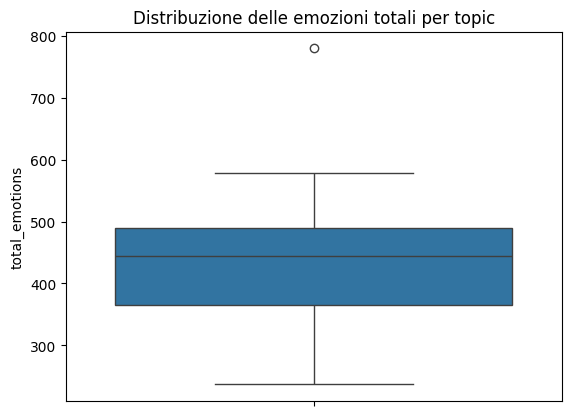

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=emotion_counts['total_emotions'])
plt.title('Distribuzione delle emozioni totali per topic')
plt.show()

In [ ]:
# A CAUSA DELL'OUTLIER RELATIVO AL TOPIC SOCIETÀ E IDENTITÀ IL TEST CHI QUADRO ON HA MOLTISSIMO SENSO.

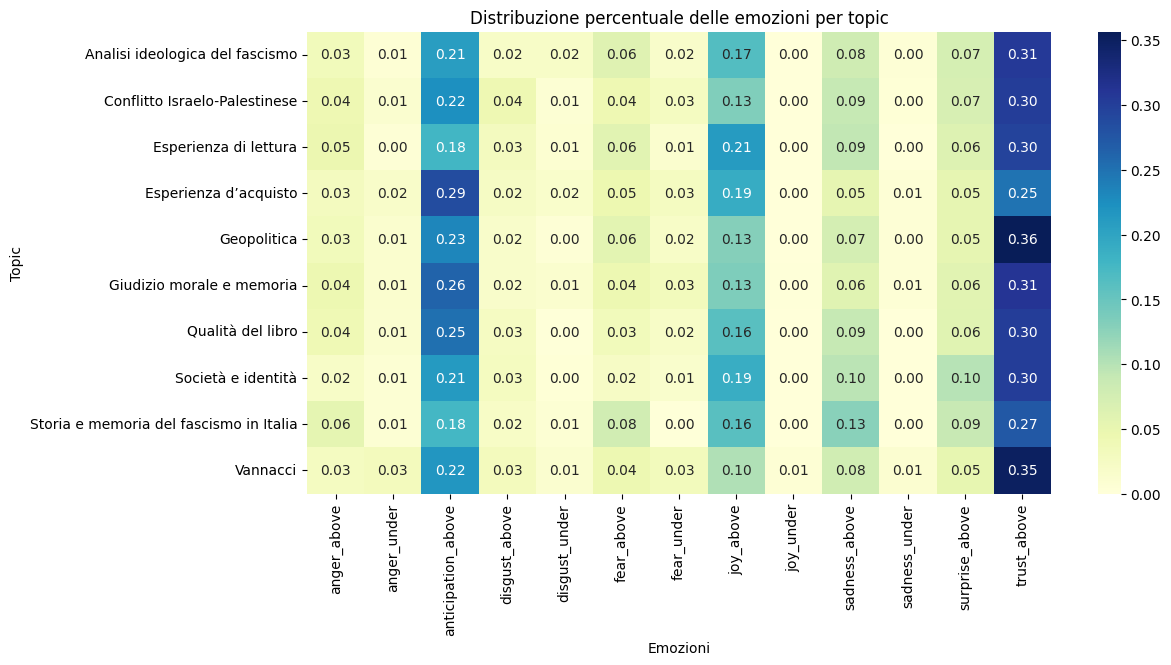

In [ ]:
#NOTA RICORDATI CHE EMOTION_PERCENTAGE DEVE ESSERE TOLTA LA COLONNA COI TOTALI PRESA PRECEDENTEMENTE
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(emotion_percentage, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Distribuzione percentuale delle emozioni per topic")
plt.xlabel("Emozioni")
plt.ylabel("Topic")
plt.show()

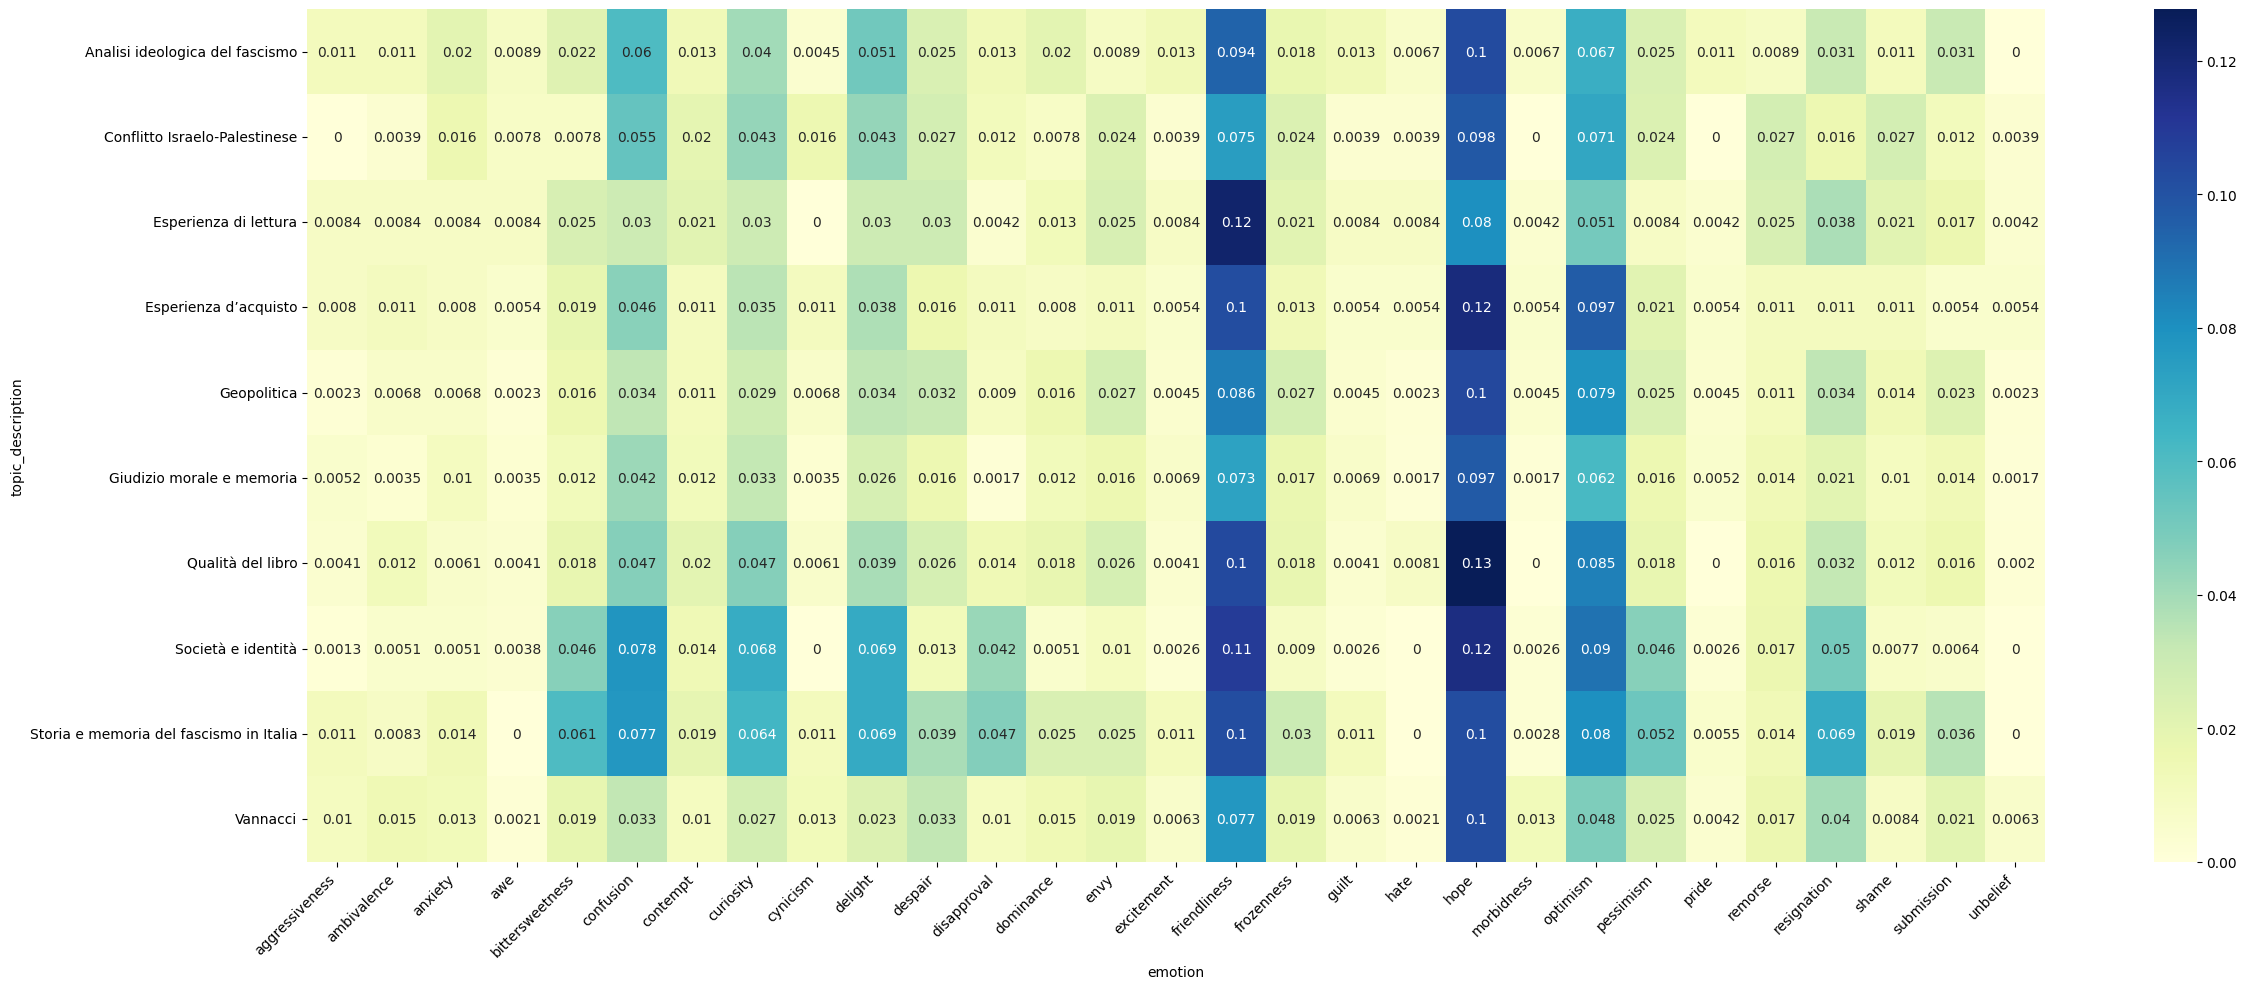

In [ ]:
#NOTA RICORDATI CHE EMOTION_PERCENTAGE DEVE ESSERE TOLTA LA COLONNA COI TOTALI PRESA PRECEDENTEMENTE
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))  # Increase width here (20 is an example)
sns.heatmap(complex_emotion_percentage, annot=True, cmap="YlGnBu")  # Customize as needed
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better fit
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
emotion_counts_COMPLEX_EMO

emotion,aggressiveness,ambivalence,anxiety,awe,bittersweetness,confusion,contempt,curiosity,cynicism,delight,...,hope,morbidness,optimism,pessimism,pride,remorse,resignation,shame,submission,unbelief
topic_description,,,,,,,,,,,,,,,,,,,,,
Analisi ideologica del fascismo,5,5,9,4,10,27,6,18,2,23,...,46,3,30,11,5,4,14,5,14,0
Conflitto Israelo-Palestinese,0,1,4,2,2,14,5,11,4,11,...,25,0,18,6,0,7,4,7,3,1
Esperienza di lettura,2,2,2,2,6,7,5,7,0,7,...,19,1,12,2,1,6,9,5,4,1
Esperienza d’acquisto,3,4,3,2,7,17,4,13,4,14,...,44,2,36,8,2,4,4,4,2,2
Geopolitica,1,3,3,1,7,15,5,13,3,15,...,46,2,35,11,2,5,15,6,10,1
Giudizio morale e memoria,3,2,6,2,7,24,7,19,2,15,...,56,1,36,9,3,8,12,6,8,1
Qualità del libro,2,6,3,2,9,23,10,23,3,19,...,63,0,42,9,0,8,16,6,8,1
Società e identità,1,4,4,3,36,61,11,53,0,54,...,91,2,70,36,2,13,39,6,5,0
Storia e memoria del fascismo in Italia,4,3,5,0,22,28,7,23,4,25,...,37,1,29,19,2,5,25,7,13,0


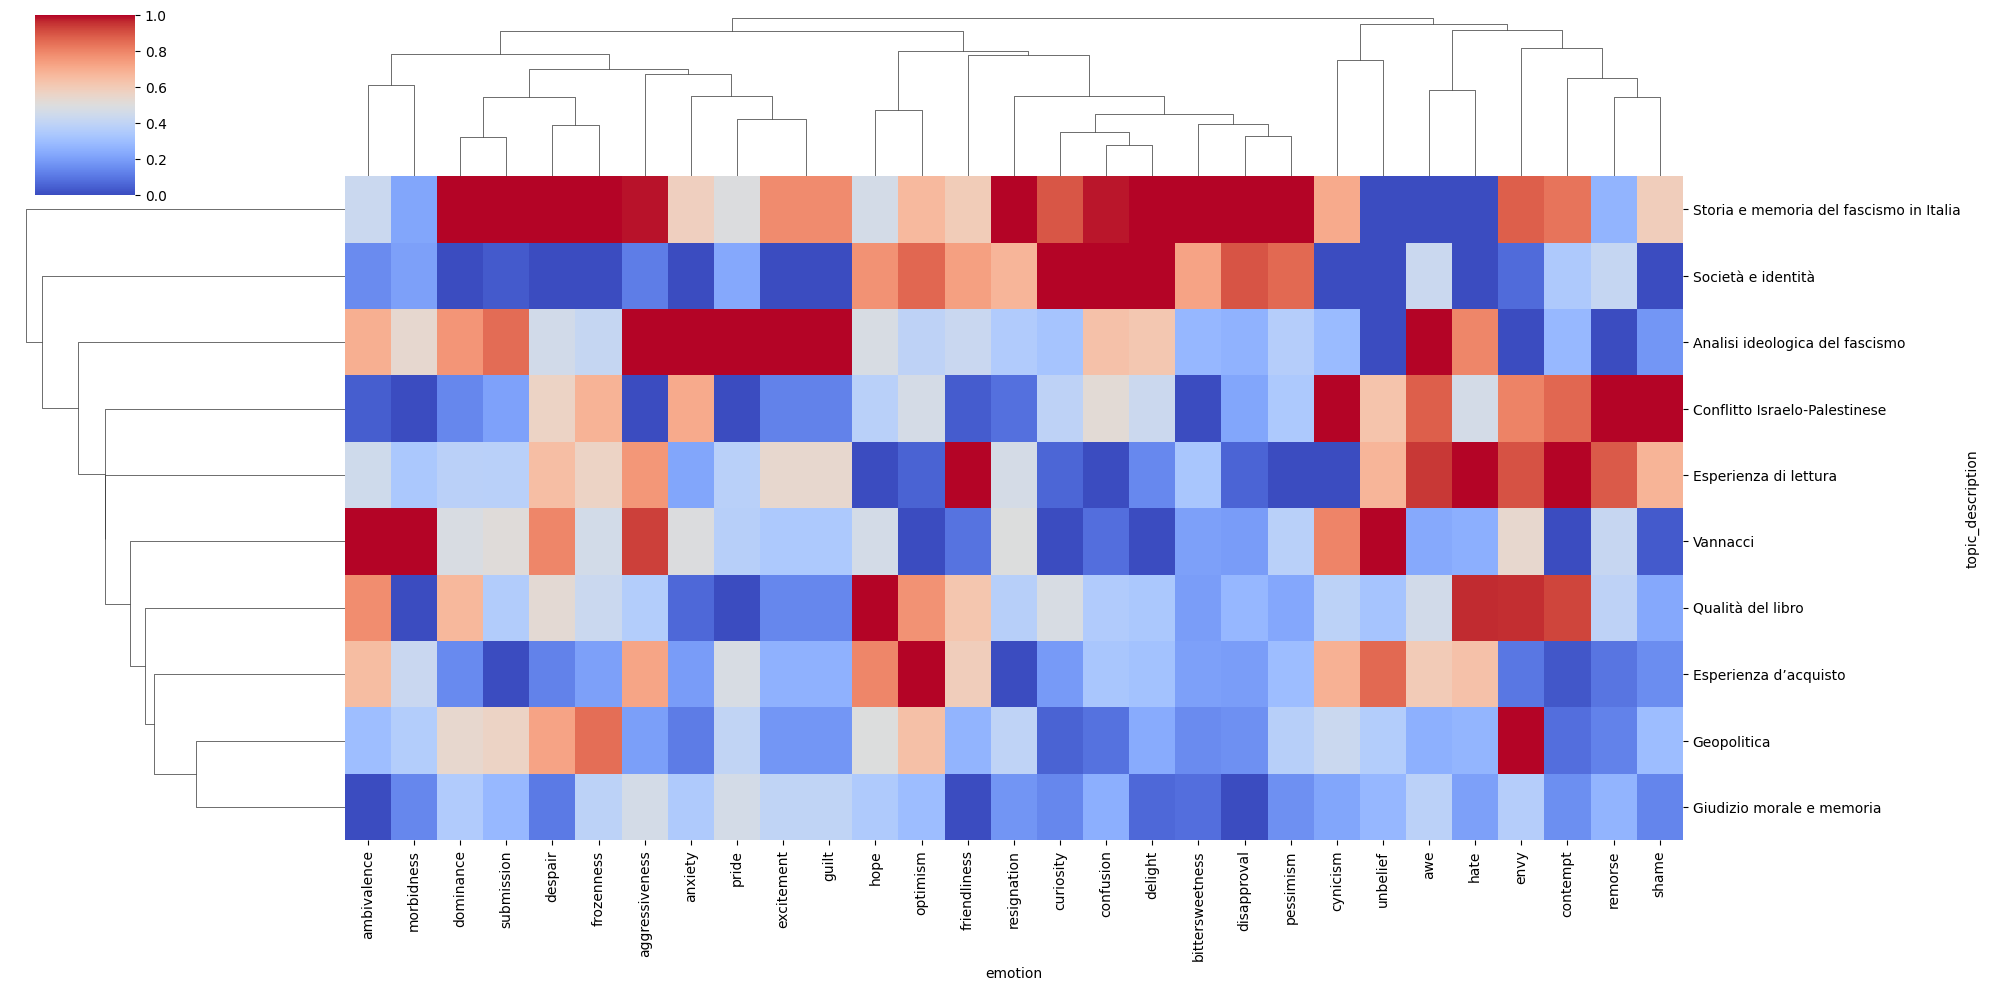

In [ ]:
sns.clustermap(complex_emotion_percentage, cmap="coolwarm", figsize=(20, 10), standard_scale=1)


<Axes: xlabel='topic_description'>

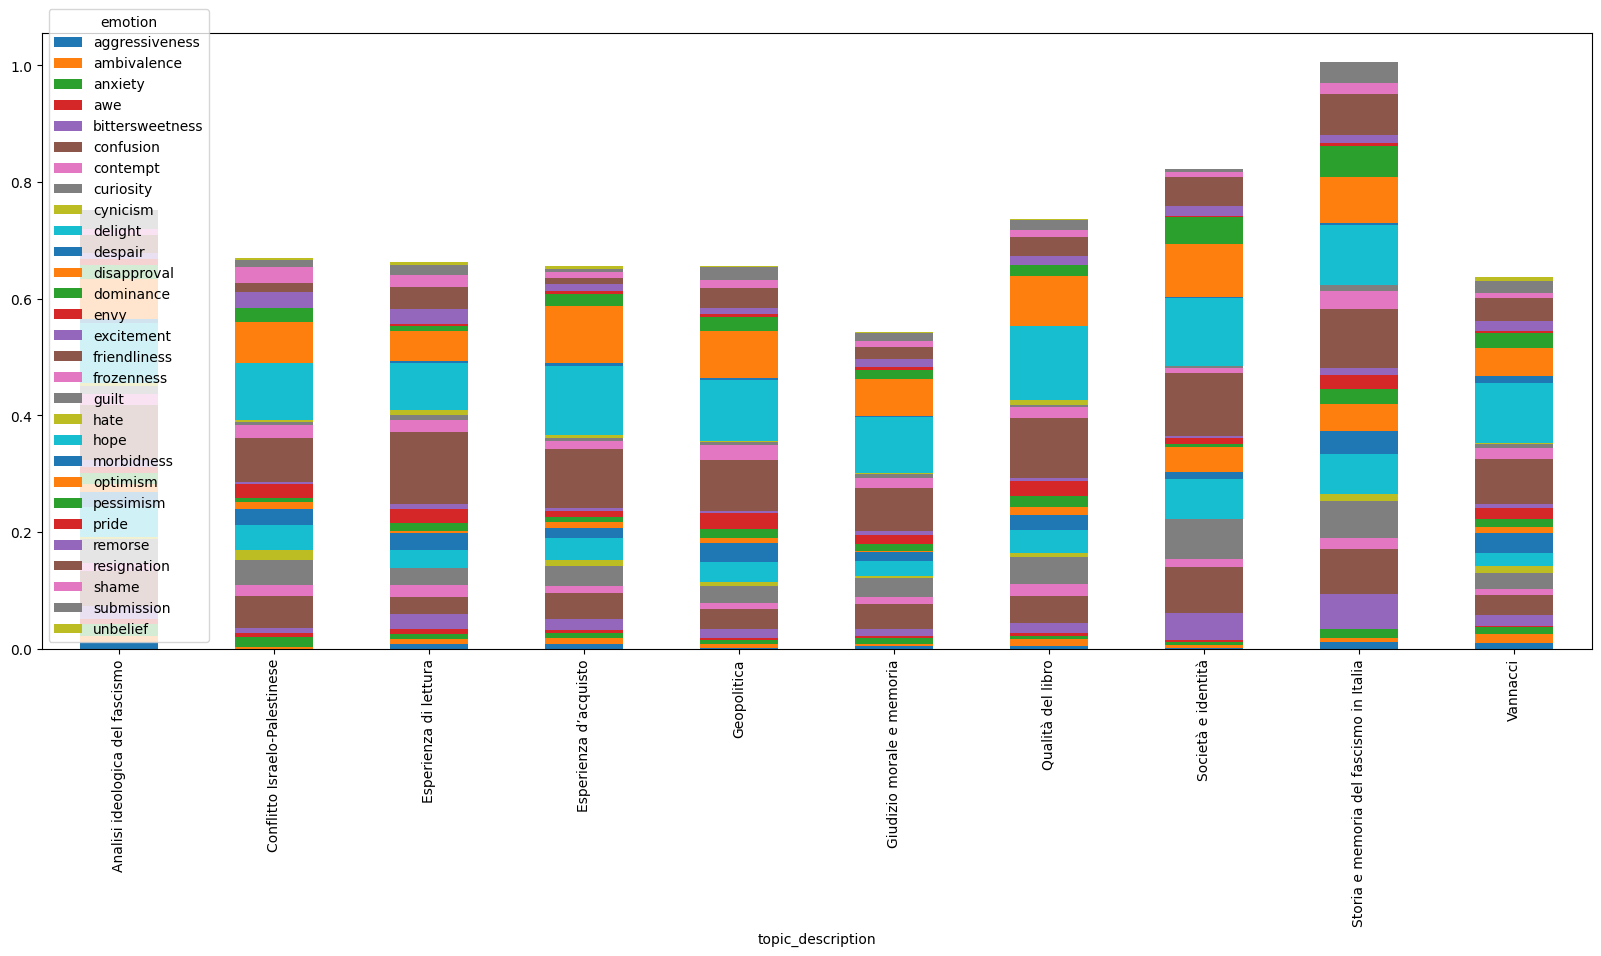

In [ ]:
complex_emotion_percentage.plot(kind="bar", stacked=True, figsize=(20, 8))


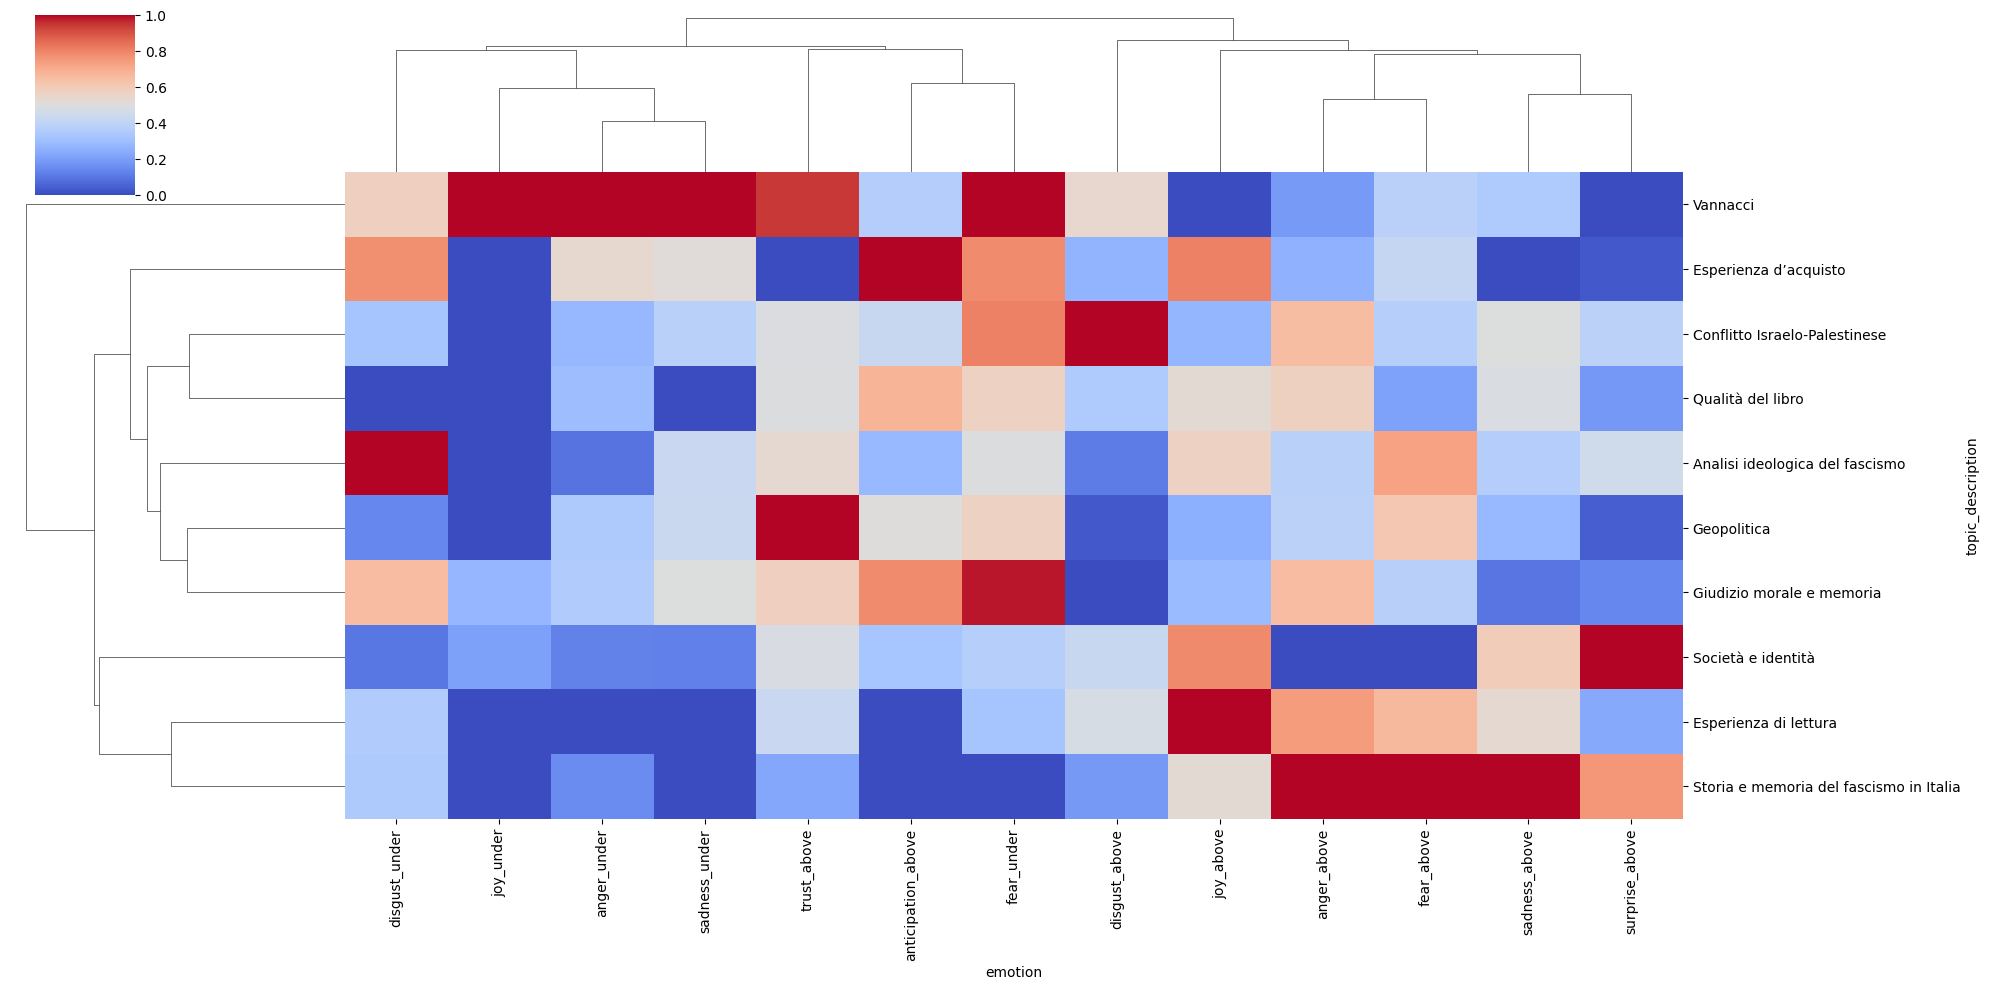

In [ ]:
sns.clustermap(emotion_percentage, cmap="coolwarm", figsize=(20, 10), standard_scale=1)


In [ ]:
emotion_percentage

NameError: name 'emotion_percentage' is not defined

In [ ]:
# SAREBBE INTERESSANTE INTEGRARE ANCHE QUAL'È LA PERCENTUALE DELLE REVIEW CHE HANNO ELICITATO ALMENO UN EMOZIONE O UNA EMOZIONE COMPLESSA